In [ ]:
# Decision Tree Theory

# Q1: What is a Decision Tree, and how does it work?
"""
A Decision Tree is a supervised learning algorithm that splits data into subsets based on feature values.
Each internal node represents a condition, branches represent outcomes, and leaf nodes represent final predictions.
"""

# Q2: What are impurity measures in Decision Trees?
"""
Impurity measures quantify the homogeneity of target variables in a node.
Common measures: Gini Impurity, Entropy.
"""

# Q3: What is the mathematical formula for Gini Impurity?
"""
Gini = 1 - Σ(p_i)^2, where p_i is the probability of class i.
"""

# Q4: What is the mathematical formula for Entropy?
"""
Entropy = -Σ(p_i * log2(p_i)), where p_i is the probability of class i.
"""

# Q5: What is Information Gain, and how is it used in Decision Trees?
"""
Information Gain = Entropy(parent) - Weighted avg. Entropy(children)
It measures how much uncertainty is reduced by a split and helps select the best feature for splitting.
"""

# Q6: What is the difference between Gini Impurity and Entropy?
"""
Both measure node impurity, but:
- Gini is computationally faster and tends to isolate the most frequent class.
- Entropy involves logarithmic operations and gives slightly different splits.
"""

# Q7: What is the mathematical explanation behind Decision Trees?
"""
Decision Trees use a recursive binary splitting approach.
At each node, the feature and split point that result in the highest information gain (or lowest Gini) are selected.
This continues until a stopping criterion is met.
"""

# Q8: What is Pre-Pruning in Decision Trees?
"""
Pre-Pruning stops the tree from growing if a condition is met (e.g., max depth, min samples per leaf).
It helps prevent overfitting.
"""

# Q9: What is Post-Pruning in Decision Trees?
"""
Post-Pruning allows the tree to fully grow first, then removes branches that have little contribution to accuracy.
It's done using validation data.
"""

# Q10: What is the difference between Pre-Pruning and Post-Pruning?
"""
- Pre-Pruning halts growth early.
- Post-Pruning removes unnecessary branches after full growth.
"""

# Q11: What is a Decision Tree Regressor?
"""
A Decision Tree Regressor predicts continuous values by minimizing variance within each split.
"""

# Q12: What are the advantages and disadvantages of Decision Trees?
"""
Advantages:
- Easy to understand and interpret.
- Works with both numerical and categorical data.

Disadvantages:
- Prone to overfitting.
- Unstable with small changes in data.
"""

# Q13: How does a Decision Tree handle missing values?
"""
Some implementations handle missing values by:
- Using surrogate splits.
- Imputing missing values before training.
"""

# Q14: How does a Decision Tree handle categorical features?
"""
Categorical features are handled by evaluating splits on each category or grouping them to maximize information gain.
Some libraries (like scikit-learn) require one-hot encoding.
"""

# Q15: What are some real-world applications of Decision Trees?
"""
- Medical diagnosis
- Credit risk scoring
- Fraud detection
- Customer segmentation
- Stock market prediction
"""


16-> Accuracy (Default): 1.0
17-> Feature Importances (Gini): [0.         0.01667014 0.90614339 0.07718647]
18-> Accuracy (Entropy): 1.0
19-> MSE (Decision Tree Regressor): 0.495235205629094
21.1 -> Accuracy (Depth 3): 1.0
21.2-> Accuracy (Full Tree): 1.0
22.1-> Accuracy (min_samples_split=5): 1.0
22.2-> Accuracy (Default Tree): 1.0
23.1-> Accuracy (Unscaled): 1.0
23.2-> Accuracy (Scaled): 1.0
24-> Accuracy (OvR): 1.0
25-> Feature Importances: [0.         0.01667014 0.90614339 0.07718647]
26.1-> MSE (max_depth=5): 0.5245146178314735
26.2-> MSE (Unrestricted): 0.495235205629094


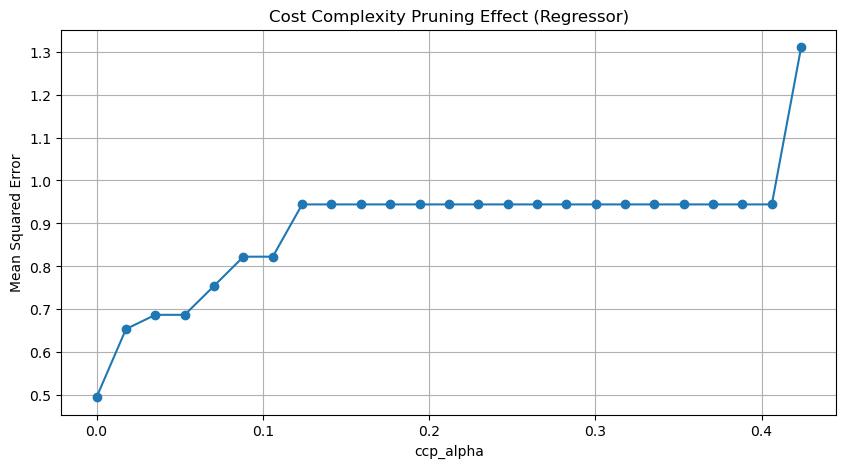

28.1-> Precision: 1.0
28.2-> Recall: 1.0
28.3-> F1-Score: 1.0


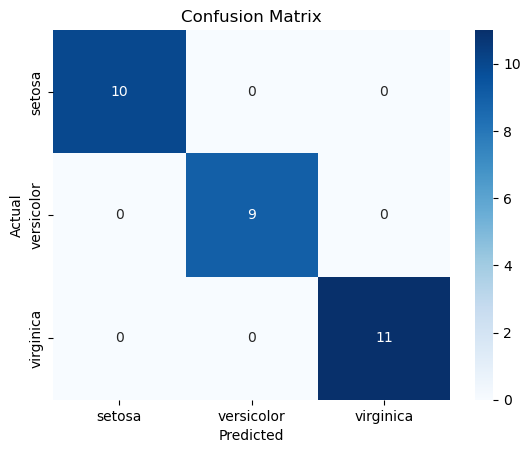

30.1-> Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
30.2-> Best Accuracy: 0.9499999999999998


In [4]:
 # Decision Tree Practicals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
import graphviz
from sklearn import tree

# Q16: Train a Decision Tree Classifier on the Iris dataset and print accuracy
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
print(f"16-> Accuracy (Default):", accuracy_score(y_test, clf.predict(X_test)))

# Q17: Train using Gini Impurity and print feature importances
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)
print(f"17-> Feature Importances (Gini):", clf_gini.feature_importances_)

# Q18: Train using Entropy and print model accuracy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)
print(f"18-> Accuracy (Entropy):", accuracy_score(y_test, clf_entropy.predict(X_test)))

# Q19: Train a Decision Tree Regressor on housing dataset and evaluate with MSE
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
print(f"19-> MSE (Decision Tree Regressor):", mean_squared_error(y_test, regressor.predict(X_test)))

# Q20: Visualize the Decision Tree using graphviz
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names,
                                 class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris_tree")  # This creates iris_tree.pdf

# Q21: Train tree with max_depth=3 and compare accuracy
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_depth3.fit(X_train, y_train)
print(f"21.1 -> Accuracy (Depth 3):", accuracy_score(y_test, clf_depth3.predict(X_test)))
print(f"21.2-> Accuracy (Full Tree):", accuracy_score(y_test, clf.predict(X_test)))

# Q22: Train with min_samples_split=5 and compare accuracy
clf_split = DecisionTreeClassifier(min_samples_split=5, random_state=42)
clf_split.fit(X_train, y_train)
print(f"22.1-> Accuracy (min_samples_split=5):", accuracy_score(y_test, clf_split.predict(X_test)))
print(f"22.2-> Accuracy (Default Tree):", accuracy_score(y_test, clf.predict(X_test)))

# Q23: Apply feature scaling and compare accuracy
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_scaled = DecisionTreeClassifier(random_state=42)
clf_scaled.fit(X_train_scaled, y_train)
print(f"23.1-> Accuracy (Unscaled):", accuracy_score(y_test, clf.predict(X_test)))
print(f"23.2-> Accuracy (Scaled):", accuracy_score(y_test, clf_scaled.predict(X_test_scaled)))

# Q24: Use One-vs-Rest strategy for multiclass classification
ovr_clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr_clf.fit(X_train, y_train)
print(f"24-> Accuracy (OvR):", accuracy_score(y_test, ovr_clf.predict(X_test)))

# Q25: Display feature importance scores
print(f"25-> Feature Importances:", clf.feature_importances_)

# Q26: Compare DecisionTreeRegressor with max_depth=5 vs unrestricted
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
reg_restrict = DecisionTreeRegressor(max_depth=5, random_state=42)
reg_restrict.fit(X_train, y_train)
mse_restrict = mean_squared_error(y_test, reg_restrict.predict(X_test))
mse_full = mean_squared_error(y_test, regressor.predict(X_test))

print(f"26.1-> MSE (max_depth=5):", mse_restrict)
print(f"26.2-> MSE (Unrestricted):", mse_full)

# Q27: Apply Cost Complexity Pruning and visualize accuracy effect
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = DecisionTreeRegressor(random_state=42)
path = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = np.linspace(path.ccp_alphas.min(), path.ccp_alphas.max(), 25)
mse_list = []

for ccp in ccp_alphas:
    reg_pruned = DecisionTreeRegressor(ccp_alpha=ccp, random_state=42)
    reg_pruned.fit(X_train, y_train)
    mse = mean_squared_error(y_test, reg_pruned.predict(X_test))
    mse_list.append(mse)

plt.figure(figsize=(10, 5))
plt.plot(ccp_alphas, mse_list, marker='o')
plt.xlabel("ccp_alpha")
plt.ylabel("Mean Squared Error")
plt.title("Cost Complexity Pruning Effect (Regressor)")
plt.grid(True)
plt.show()

# Q28: Evaluate Decision Tree using Precision, Recall, and F1-Score
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"28.1-> Precision:", precision_score(y_test, y_pred, average='macro'))
print(f"28.2-> Recall:", recall_score(y_test, y_pred, average='macro'))
print(f"28.3-> F1-Score:", f1_score(y_test, y_pred, average='macro'))

# Q29: Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Q30: Use GridSearchCV to tune max_depth and min_samples_split
param_grid = {'max_depth': [2, 3, 4, 5], 'min_samples_split': [2, 5, 10]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_train, y_train)

print(f"30.1-> Best Parameters:", grid.best_params_)
print(f"30.2-> Best Accuracy:", grid.best_score_)
